In [1]:
import numpy as np
from scipy.integrate import ode
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
a= np.array([[2,3],[1,-2]])
b= np.array([1,4])
x= np.linalg.solve(a,b)

x

array([ 2., -1.])

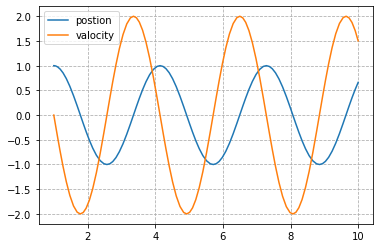

In [3]:
#미분방정식 예제 : 단진자( x'' = - w^2 x)

def odefun(t,Z,w):
    dZdt = np.zeros(2)
    dZdt[0] = Z[1]
    dZdt[1] = - w**2 * Z[0]
    return dZdt

A=1
w=2
t0, tf = 1, 10
Z0 = np.array([A,0])

solver = ode(odefun).set_integrator('dopri5')
sol = []

def solout(t,Z):
    sol.append([t,*Z]) # a = np.array([1,2]) ;   print([2,*a]) ;   =>Result : [2, 1, 2]
    
solver.set_solout(solout)
solver.set_initial_value(Z0,t0).set_f_params(w)
solver.integrate(tf)

sol = np.array(sol)

plt.plot(sol[:,0],sol[:,1])
plt.plot(sol[:,0],sol[:,2])
plt.legend(['postion', 'valocity'])
plt.grid(True, linestyle='--')

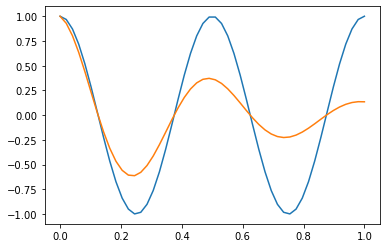

In [4]:
x=np.linspace(0,1,50)

y1=np.cos(4*np.pi*x)
y2=np.cos(4*np.pi*x)*np.exp(-2*x)

plt.plot(x,y1)
plt.plot(x,y2)


In [7]:
def objective(x): #object
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1*x4*(x1+x2+x3)+x3

#constraints
def constraint1 (x):
    return x[0]*x[1]*x[2]*x[3]-25.0
def constraint2 (x):
    sum_sq=40
    for i in range(4):
        sum_sq -= x[i]**2
    return sum_sq

In [8]:
x0 = [1,5,5,1]

print(objective(x0))

16


In [9]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq' , 'fun':constraint1 }
con2 = {'type':'ineq' , 'fun':constraint2 }
cons = [con1,con2]

In [13]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
sol

     fun: 17.014017245446883
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299601, 3.82115474, 1.37940763])

In [1]:
ode.pi

NameError: name 'ode' is not defined